Build a classifier for the MNIST dataset with >95% test accuracy.

In [73]:
import numpy as np

In [74]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [75]:
X, y = mnist['data'], mnist['target']

In [76]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
X_test_scaled = scaler.transform(X_test.astype(np.float64))


In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['distance'],
    'p': [1, 2]
}
gsearch = GridSearchCV(estimator=knn, param_grid=param_grid, cv=3, n_jobs=-1, scoring="accuracy" )
gsearch.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7], 'p': [1, 2],
                         'weights': ['distance']},
             scoring='accuracy')

In [17]:
from sklearn.metrics import accuracy_score
y_pred = gsearch.predict(X_test_scaled)
accuracy_score(y_test, y_pred)


0.9592

## ✅ Task Summary:
Write a function to shift an MNIST image by 1 pixel in any direction (up, down, left, right).

For each training image, generate 4 shifted copies and add them to the dataset.

Retrain your best model on this augmented training set and evaluate it on the test set.

You should see an improvement in accuracy — this is called data augmentation.

In [87]:
from scipy.ndimage import shift
import matplotlib.pyplot as plt

def shiftImage(image, dx, dy):
    image = image.reshape((28, 28))
    shiftedImage = shift(image, shift=[dy, dx], mode='constant', cval=0)
    return shiftedImage.flatten()

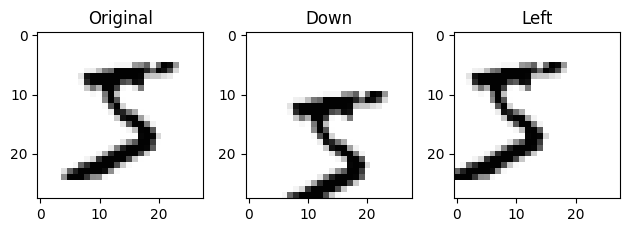

In [79]:
image = X_train.iloc[0].values
shifted_image_down = shiftImage(image, 0, 5)
shifted_image_left = shiftImage(image, -5, 0)

plt.subplot(131); plt.imshow(image.reshape(28, 28), cmap='Greys'); plt.title("Original")
plt.subplot(132); plt.imshow(shifted_image_down, cmap='Greys'); plt.title("Down")
plt.subplot(133); plt.imshow(shifted_image_left, cmap='Greys'); plt.title("Left")
plt.tight_layout()
plt.show()

In [89]:
X_train_array = X_train.to_numpy()
y_train_array = np.array(y_train)

# ✅ Initialize augmentation lists
X_train_augmented = [image for image in X_train_array]  # all are np.array of shape (784,)
y_train_augmented = [label for label in y_train_array]

# ✅ Perform shifts and augment
for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train_array, y_train_array):
        shifted_image = shiftImage(image, dx, dy)
        X_train_augmented.append(shifted_image)
        y_train_augmented.append(label)

# ✅ Convert to NumPy arrays safely
X_train_augmented = np.array(X_train_augmented)  # shape will be (N, 784)
y_train_augmented = np.array(y_train_augmented)  # shape will be (N,)

In [90]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [91]:

knn_clf = KNeighborsClassifier(**gsearch.best_params_)
knn_clf.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')

In [92]:
y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)

C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


0.9683

In [100]:
import os
import urllib.request

TITANIC_PATH = os.path.join("datasets", "titanic")
DOWNLOAD_URL = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/titanic/"

def fetch_titanic_data(url=DOWNLOAD_URL, path=TITANIC_PATH):
    if not os.path.isdir(path):
        os.makedirs(path)
    for filename in ("train.csv", "test.csv"):
        filepath = os.path.join(path, filename)
        if not os.path.isfile(filepath):
            print("Downloading", filename)
            urllib.request.urlretrieve(url + filename, filepath)

fetch_titanic_data()    

## Tackle the Titanic dataset. A great place to start is on Kaggle

In [94]:
import pandas as pd

def load_titanic_data(filename, titanic_path=TITANIC_PATH):
    csv_path = os.path.join(titanic_path, filename)
    return pd.read_csv(csv_path)

In [131]:
train_data = load_titanic_data("train.csv")
test_data = load_titanic_data("test.csv")

In [132]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [147]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [148]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [144]:

y_train = train_data["Survived"].copy()

In [146]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

In [159]:
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoding", OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
])

In [160]:
from sklearn.compose import ColumnTransformer

num_attribs = ["Age", "SibSp", "Parch", "Fare"]
cat_attribs = ["Pclass", "Sex", "Embarked", "Cabin"]

preprocess_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

In [161]:
X_train = preprocess_pipeline.fit_transform(
    train_data[num_attribs + cat_attribs])
X_train

array([[-0.56573582,  0.43279337, -0.47367361, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.6638609 ,  0.43279337, -0.47367361, ...,  0.        ,
         0.        ,  0.        ],
       [-0.25833664, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.10463705,  0.43279337,  2.00893337, ...,  0.        ,
         0.        ,  0.        ],
       [-0.25833664, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.20276213, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  0.        ]])

In [162]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [163]:
X_test = preprocess_pipeline.transform(
    test_data[num_attribs + cat_attribs])

y_pred = forest_clf.predict(X_test)

In [175]:
from sklearn.model_selection import cross_val_score
forest_score = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_score.mean()

np.float64(0.8159800249687891)

In [169]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto")
svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
svm_scores.mean()

np.float64(0.791223470661673)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9484\3143951784.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([svm_scores, forest_score], labels=("SVM","Random Forest"))


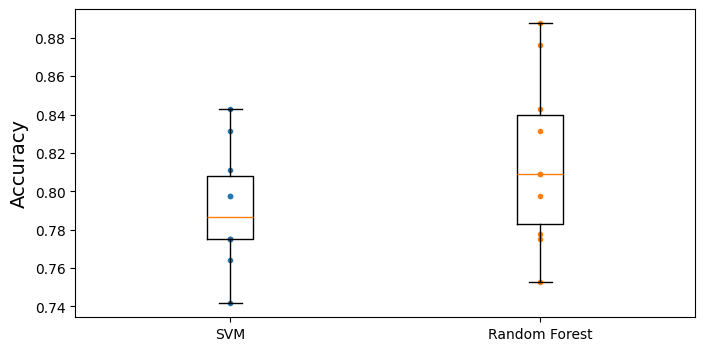

In [176]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, forest_score, ".")
plt.boxplot([svm_scores, forest_score], labels=("SVM","Random Forest"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()

## ✅ Task Summary:
Build a spam classifier using the SpamAssassin dataset.

Preprocess emails into feature vectors (e.g., word presence or word counts).

Create a pipeline with optional steps: remove headers, lowercase, remove punctuation, replace URLs/numbers, and apply stemming.

Train and evaluate different classifiers to achieve high precision and recall.



In [205]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "http://spamassassin.apache.org/old/publiccorpus/"
HAM_URL = DOWNLOAD_ROOT + "20030228_easy_ham.tar.bz2"
SPAM_URL = DOWNLOAD_ROOT + "20030228_spam.tar.bz2"
SPAM_PATH = os.path.join("datasets", "spam")

def fetch_spam_data(ham_url=HAM_URL, spam_url=SPAM_URL, spam_path=SPAM_PATH):
    if not os.path.isdir(spam_path):
        os.makedirs(spam_path)
    for filename, url in (("ham.tar.bz2", ham_url), ("spam.tar.bz2", spam_url)):
        path = os.path.join(spam_path, filename)
        if not os.path.isfile(path):
            urllib.request.urlretrieve(url, path)
        tar_bz2_file = tarfile.open(path)
        tar_bz2_file.extractall(path=spam_path)
        tar_bz2_file.close()

In [206]:
fetch_spam_data()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9484\3115047454.py:18: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar_bz2_file.extractall(path=spam_path)


In [207]:
HAM_DIR = os.path.join(SPAM_PATH, "easy_ham")
SPAM_DIR = os.path.join(SPAM_PATH, "spam")
ham_filenames = [name for name in sorted(os.listdir(HAM_DIR)) if len(name) > 20]
spam_filenames = [name for name in sorted(os.listdir(SPAM_DIR)) if len(name) > 20]

In [208]:
len(ham_filenames)

2500

In [209]:
len(spam_filenames)

500

In [237]:
import email
import email.parser
import email.policy

def load_email(is_spam, filename, spam_path=SPAM_PATH):
    directory = "spam" if is_spam else "easy_ham"
    with open(os.path.join(spam_path, directory, filename), "rb") as f:
        return email.parser.BytesParser(policy=email.policy.default).parse(f)



In [238]:
ham_emails = [load_email(is_spam=False, filename=name) for name in ham_filenames]
spam_emails = [load_email(is_spam=True, filename=name) for name in spam_filenames]

In [239]:
def get_email_structure(email):
    if isinstance(email, str):
        return email
    
    payload = email.get_payload()
    if isinstance(payload, list):
        return "multipart({})".format(", ".join([
            get_email_structure(sub_email)
            for sub_email in payload
        ]))
    else:
        return email.get_content_type()

In [240]:
from collections import Counter


def get_structure_count(emails):
    structures = Counter()
    for email in emails:
        structure = get_email_structure(email)
        structures[structure] += 1
    
    return structures

In [241]:
get_structure_count(ham_emails)

Counter({'text/plain': 2408,
         'multipart(text/plain, application/pgp-signature)': 66,
         'multipart(text/plain, text/html)': 8,
         'multipart(text/plain, text/plain)': 4,
         'multipart(text/plain)': 3,
         'multipart(text/plain, application/octet-stream)': 2,
         'multipart(text/plain, text/enriched)': 1,
         'multipart(text/plain, application/ms-tnef, text/plain)': 1,
         'multipart(multipart(text/plain, text/plain, text/plain), application/pgp-signature)': 1,
         'multipart(text/plain, video/mng)': 1,
         'multipart(text/plain, multipart(text/plain))': 1,
         'multipart(text/plain, application/x-pkcs7-signature)': 1,
         'multipart(text/plain, multipart(text/plain, text/plain), text/rfc822-headers)': 1,
         'multipart(text/plain, multipart(text/plain, text/plain), multipart(multipart(text/plain, application/x-pkcs7-signature)))': 1,
         'multipart(text/plain, application/x-java-applet)': 1})

In [242]:
get_structure_count(spam_emails)

Counter({'text/plain': 218,
         'text/html': 183,
         'multipart(text/plain, text/html)': 45,
         'multipart(text/html)': 20,
         'multipart(text/plain)': 19,
         'multipart(multipart(text/html))': 5,
         'multipart(text/plain, image/jpeg)': 3,
         'multipart(text/html, application/octet-stream)': 2,
         'multipart(text/plain, application/octet-stream)': 1,
         'multipart(text/html, text/plain)': 1,
         'multipart(multipart(text/html), application/octet-stream, image/jpeg)': 1,
         'multipart(multipart(text/plain, text/html), image/gif)': 1,
         'multipart/alternative': 1})

In [255]:
from sklearn.model_selection import train_test_split
X = np.array(ham_emails + spam_emails, dtype=object)
y = np.array([0]*len(ham_emails) + [1]*len(spam_emails))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [256]:
import re
from html import unescape

def html_to_plain_text(html):
    text = re.sub('<head.*?>.*?</head>', '', html, flags=re.M | re.S | re.I)
    text = re.sub('<a\s.*?>', ' HYPERLINK ', text, flags=re.M | re.S | re.I)
    text = re.sub('<.*?>', '', text, flags=re.M | re.S)
    text = re.sub(r'(\s*\n)+', '\n', text, flags=re.M | re.S)
    return unescape(text)

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9484\3203418293.py:6: SyntaxWarning: invalid escape sequence '\s'
  text = re.sub('<a\s.*?>', ' HYPERLINK ', text, flags=re.M | re.S | re.I)


In [259]:
html_spam_emails = [email for email in X_train[y_train==1]
                    if get_email_structure(email) == "text/html"]
sample_html_spam = html_spam_emails[7]
print(sample_html_spam.get_content().strip()[:1000], "...")

<HTML><HEAD><TITLE></TITLE><META http-equiv="Content-Type" content="text/html; charset=windows-1252"><STYLE>A:link {TEX-DECORATION: none}A:active {TEXT-DECORATION: none}A:visited {TEXT-DECORATION: none}A:hover {COLOR: #0033ff; TEXT-DECORATION: underline}</STYLE><META content="MSHTML 6.00.2713.1100" name="GENERATOR"></HEAD>
<BODY text="#000000" vLink="#0033ff" link="#0033ff" bgColor="#CCCC99"><TABLE borderColor="#660000" cellSpacing="0" cellPadding="0" border="0" width="100%"><TR><TD bgColor="#CCCC99" valign="top" colspan="2" height="27">
<font size="6" face="Arial, Helvetica, sans-serif" color="#660000">
<b>OTC</b></font></TD></TR><TR><TD height="2" bgcolor="#6a694f">
<font size="5" face="Times New Roman, Times, serif" color="#FFFFFF">
<b>&nbsp;Newsletter</b></font></TD><TD height="2" bgcolor="#6a694f"><div align="right"><font color="#FFFFFF">
<b>Discover Tomorrow's Winners&nbsp;</b></font></div></TD></TR><TR><TD height="25" colspan="2" bgcolor="#CCCC99"><table width="100%" border="0" 

In [260]:
print(html_to_plain_text(sample_html_spam.get_content())[:1000], "...")


OTC
 Newsletter
Discover Tomorrow's Winners 
For Immediate Release
Cal-Bay (Stock Symbol: CBYI)
Watch for analyst "Strong Buy Recommendations" and several advisory newsletters picking CBYI.  CBYI has filed to be traded on the OTCBB, share prices historically INCREASE when companies get listed on this larger trading exchange. CBYI is trading around 25 cents and should skyrocket to $2.66 - $3.25 a share in the near future.
Put CBYI on your watch list, acquire a position TODAY.
REASONS TO INVEST IN CBYI
A profitable company and is on track to beat ALL earnings estimates!
One of the FASTEST growing distributors in environmental & safety equipment instruments.
Excellent management team, several EXCLUSIVE contracts.  IMPRESSIVE client list including the U.S. Air Force, Anheuser-Busch, Chevron Refining and Mitsubishi Heavy Industries, GE-Energy & Environmental Research.
RAPIDLY GROWING INDUSTRY
Industry revenues exceed $900 million, estimates indicate that there could be as much as $25 billi

In [262]:

def email_to_text(email):
    html=None
    for part in email.walk():
        c_type = part.get_content_type()
        if not c_type in ("text/plain", "text/html"):
            continue
        
        try:
            content = part.get_content()
        except:
            content = part.get_payload()
        if c_type == "text/plain":
            return content
        else:
            html = content
    
    if html:
        return html_to_plain_text(html)



In [263]:
print(email_to_text(sample_html_spam)[:100], "...")


OTC
 Newsletter
Discover Tomorrow's Winners 
For Immediate Release
Cal-Bay (Stock Symbol: CBYI)
Wat ...


In [191]:
#Class banai hai jiss se apn word count karenge
"""
    #import BaseEstimator, TransformerMixin
    1: EmailToWordCountClass()
    2: __init__(self,header_stripe, lower_case=True, remove_punctuation=True, preplace_url, replace_number, stemmer_apply)
    3: fit(self, X, y=none)
        return self
    4: transform(self, X, y=none)
        loop(email from X):
            -> check header and apply logic
            -> check lowercase and apply logic
            -> check punctuation and apply logic and so on
            -> ......
            -> stemmer_apply_check and logic apply
            -> count the word
"""
#class banani jiss se un word ko apn documnets ke andar convert karenge row wise and col wise

'\n    1:\n'

In [264]:
import urlextract

url_extractor = urlextract.URLExtract()

In [270]:
import nltk

Stemmer = nltk.PorterStemmer()

In [296]:
from sklearn.base import BaseEstimator, TransformerMixin


class EmailToWordCountClass(BaseEstimator, TransformerMixin):
    def __init__(self, header_streap=True, lowercase = True, remove_punctuation=True, replace_urls=True, replace_numbers=True, stemming=True):
        self.header_streap = header_streap
        self.lowercase = lowercase
        self.remove_punctuation = remove_punctuation
        self.replace_urls = replace_urls
        self.replace_numbers = replace_numbers  
        self.stemming=stemming

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):

        X_transformer = []
        
        for email in X:
            text = email_to_text(email) or ""

            if self.lowercase:
                text = text.lower()

            if self.replace_urls:
                urls = list(url_extractor.find_urls(text))
                for url in urls:
                    text = text.replace(url, " URL ")

            
            if self.remove_punctuation:
                text = re.sub(r'\W+', ' ', text, flags=re.M)

            if self.replace_numbers:
                text = re.sub(r'\d+(?:\.\d*)?(?:[eE][+-]?\d+)?', 'NUMBER', text)

            word_counts = Counter(text.split())

            if self.stemming:
                stemmed_word_counts = Counter()

                for word, count in word_counts.items():
                    stemmed_word = Stemmer.stem(word)
                    stemmed_word_counts[stemmed_word] += count
                
                word_counts = stemmed_word_counts
            
            X_transformer.append(word_counts)
    
        return np.array(X_transformer, dtype=object)


In [297]:
X_few = X_train[:3]
X_few_wordcounts = EmailToWordCountClass().fit_transform(X_few)
X_few_wordcounts

array([Counter({'chuck': 1, 'murcko': 1, 'wrote': 1, 'stuff': 1, 'yawn': 1, 'r': 1}),
       Counter({'the': 11, 'of': 9, 'and': 8, 'all': 3, 'christian': 3, 'to': 3, 'by': 3, 'jefferson': 2, 'i': 2, 'have': 2, 'superstit': 2, 'one': 2, 'on': 2, 'been': 2, 'ha': 2, 'half': 2, 'rogueri': 2, 'teach': 2, 'jesu': 2, 'some': 1, 'interest': 1, 'quot': 1, 'url': 1, 'thoma': 1, 'examin': 1, 'known': 1, 'word': 1, 'do': 1, 'not': 1, 'find': 1, 'in': 1, 'our': 1, 'particular': 1, 'redeem': 1, 'featur': 1, 'they': 1, 'are': 1, 'alik': 1, 'found': 1, 'fabl': 1, 'mytholog': 1, 'million': 1, 'innoc': 1, 'men': 1, 'women': 1, 'children': 1, 'sinc': 1, 'introduct': 1, 'burnt': 1, 'tortur': 1, 'fine': 1, 'imprison': 1, 'what': 1, 'effect': 1, 'thi': 1, 'coercion': 1, 'make': 1, 'world': 1, 'fool': 1, 'other': 1, 'hypocrit': 1, 'support': 1, 'error': 1, 'over': 1, 'earth': 1, 'six': 1, 'histor': 1, 'american': 1, 'john': 1, 'e': 1, 'remsburg': 1, 'letter': 1, 'william': 1, 'short': 1, 'again': 1, 'becom

In [298]:
from scipy.sparse import csr_matrix

class WordCountToVectorArray(BaseEstimator, TransformerMixin):
    def __init__(self, vocabulary_size=1000):
        self.vocabulary_size = vocabulary_size
    
    def fit(self, X, y=None):
        total_count = Counter()
        for word_count in X:
            for word, count in word_count.items():
                total_count[word] += min(count, 10)
        

        most_common = total_count.most_common()[:self.vocabulary_size]
        self.vocabulary_ = {
            word: index + 1
            for index, (word, count) in enumerate(most_common)
        }
        return self

    def transform(self, X, y=None):
        rows = []
        cols = []
        data = []

        for row, (word_count) in enumerate(X):
            for word, count in word_count.items():
                rows.append(row)
                cols.append(self.vocabulary_.get(word, 0))
                data.append(count)
        
        return csr_matrix((data, (rows, cols)), shape=(len(X), self.vocabulary_size + 1))


In [288]:
vocab_transformer = WordCountToVectorArray(vocabulary_size=1000)
X_few_vector = vocab_transformer.fit_transform(X_few_wordcounts)
X_few_vector

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 167 stored elements and shape (3, 1001)>

In [290]:
X_few_vector.toarray()

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0, 11,  9, ...,  0,  0,  0],
       [ 0,  0,  1, ...,  0,  0,  0]])

In [291]:
vocab_transformer.vocabulary_

{'the': 1,
 'of': 2,
 'and': 3,
 'to': 4,
 'url': 5,
 'all': 6,
 'in': 7,
 'christian': 8,
 'on': 9,
 'by': 10,
 's': 11,
 'group': 12,
 'wrote': 13,
 'jefferson': 14,
 'i': 15,
 'have': 16,
 'superstit': 17,
 'one': 18,
 'been': 19,
 'ha': 20,
 'thi': 21,
 'half': 22,
 'rogueri': 23,
 'that': 24,
 'teach': 25,
 'jesu': 26,
 'forteana': 27,
 'martin': 28,
 'an': 29,
 'we': 30,
 'is': 31,
 'yahoo': 32,
 'unsubscrib': 33,
 'chuck': 34,
 'murcko': 35,
 'stuff': 36,
 'yawn': 37,
 'r': 38,
 'some': 39,
 'interest': 40,
 'quot': 41,
 'thoma': 42,
 'examin': 43,
 'known': 44,
 'word': 45,
 'do': 46,
 'not': 47,
 'find': 48,
 'our': 49,
 'particular': 50,
 'redeem': 51,
 'featur': 52,
 'they': 53,
 'are': 54,
 'alik': 55,
 'found': 56,
 'fabl': 57,
 'mytholog': 58,
 'million': 59,
 'innoc': 60,
 'men': 61,
 'women': 62,
 'children': 63,
 'sinc': 64,
 'introduct': 65,
 'burnt': 66,
 'tortur': 67,
 'fine': 68,
 'imprison': 69,
 'what': 70,
 'effect': 71,
 'coercion': 72,
 'make': 73,
 'world': 7

In [299]:
from sklearn.pipeline import Pipeline

preprocess_pipeline = Pipeline([
    ("email_to_wordcount", EmailToWordCountClass()),
    ("wordcount_to_vector", WordCountToVectorArray())
])

X_train_transform = preprocess_pipeline.fit_transform(X_train)

In [301]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
log_clf = LogisticRegression(solver="lbfgs", max_iter=1000, random_state=42)
log_clf.fit()
score = cross_val_score(log_clf, X_train_transform, y_train, cv=5, verbose=3)
score.mean()

[CV] END ................................ score: (test=0.981) total time=   0.1s
[CV] END ................................ score: (test=0.988) total time=   0.3s
[CV] END ................................ score: (test=0.985) total time=   0.3s
[CV] END ................................ score: (test=0.988) total time=   0.3s
[CV] END ................................ score: (test=0.990) total time=   0.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.7s finished


np.float64(0.9862499999999998)

In [304]:
from sklearn.metrics import precision_score, recall_score

X_test_transformed = preprocess_pipeline.transform(X_test)

log_clf = LogisticRegression(solver="lbfgs", max_iter=1000, random_state=42)
log_clf.fit(X_train_transform, y_train)

y_pred = log_clf.predict(X_test_transformed)

print("Precision: {:.2f}%".format(100 * precision_score(y_test, y_pred)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, y_pred)))

Precision: 95.88%
Recall: 97.89%
